# MMDetection 3.0 설치

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Tue Jul  4 00:27:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# install
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

# gitclone
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

# version
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.7 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.1/433.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 33.6 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 25.0 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 36698, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 36698 (delta 51), reused 142 (delta 44), pack-reused 36536
Receiving objects: 100% (36698/36698), 56.91 MiB | 12.47 MiB/s, done.
Resolving deltas: 100% (25742/25742), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Prepa

In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.0.1+cu118 cuda: True
mmdetection: 3.1.0
mmcv: 2.0.1
mmengine: 0.8.0


In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 86.7 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection


In [ ]:
# case a
%run demo/image_demo.py demo/demo.jpg rtmdet_tiny_8xb32-300e_coco.py --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth --device cpu

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

07/04 00:29:32 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
07/04 00:29:32 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

results have been saved at outputs


In [ ]:
# case b
from mmdet.apis import init_detector, inference_detector

config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



<DetDataSample(

    META INFORMATION
    ori_shape: (427, 640)
    img_id: 0
    img_path: 'demo/demo.jpg'
    img_shape: (640, 640)
    pad_shape: (640, 640)
    batch_input_shape: (640, 640)
    scale_factor: (1.0, 1.0)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.8703, 0.7677, 0.7428, 0.6995, 0.6847, 0.6238, 0.6097, 0.6063, 0.5566,
                        0.5535, 0.5015, 0.4779, 0.4746, 0.4718, 0.4639, 0.4491, 0.4410, 0.4129,
                        0.3939, 0.3650, 0.3524, 0.3442, 0.3207, 0.3191, 0.3145, 0.3144, 0.3119,
                        0.2992, 0.2890, 0.2762, 0.2760, 0.2735, 0.2694, 0.2658, 0.2572, 0.2533,
                        0.2480, 0.2347, 0.2308, 0.2259, 0.2255, 0.2252, 0.2240, 0.2235, 0.2196,
                        0.2136, 0.2099, 0.2051, 0.1983, 0.1972, 0.1972, 0.1909, 0.1903, 0.1873,
                        0.1872, 0.1828, 0.1816, 0.1794, 0.1789, 0.1761, 0.

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d jomainho/snack-data-to50 -p /content/

Saving kaggle.json to kaggle.json
100% 413M/415M [00:24<00:00, 18.3MB/s]
100% 415M/415M [00:24<00:00, 17.9MB/s]


In [ ]:
!unzip -q /content/snack-data-to50.zip -d /content/snack-data-to50

In [ ]:
import json

file_path = '/content/snack-data-to50/train/train.json'

with open(file_path, 'r') as file:
    data = json.load(file)

names = []  # List to store the values related to the 'name' key

# Iterate over the 'annotations' section of the data
for category in data['categories']:
    if 'name' in category:
        name = category['name']
        names.append(name)

# Print the extracted names
print(len(names))
print(names)

50
['65621', '50098', '30152', '45219', '30064', '30166', '50117', '50062', '30120', '20211', '10178', '45221', '10092', '30061', '10091', '30119', '25679', '30086', '50063', '15033', '45222', '65629', '65858', '30066', '50061', '20164', '10094', '90078', '30140', '15046', '45227', '30060', '15175', '10093', '65723', '90072', '10210', '30292', '10209', '45220', '35044', '30099', '30096', '65727', '65719', '65890', '90073', '10095', '20167', '30291']


# 데이터 확인

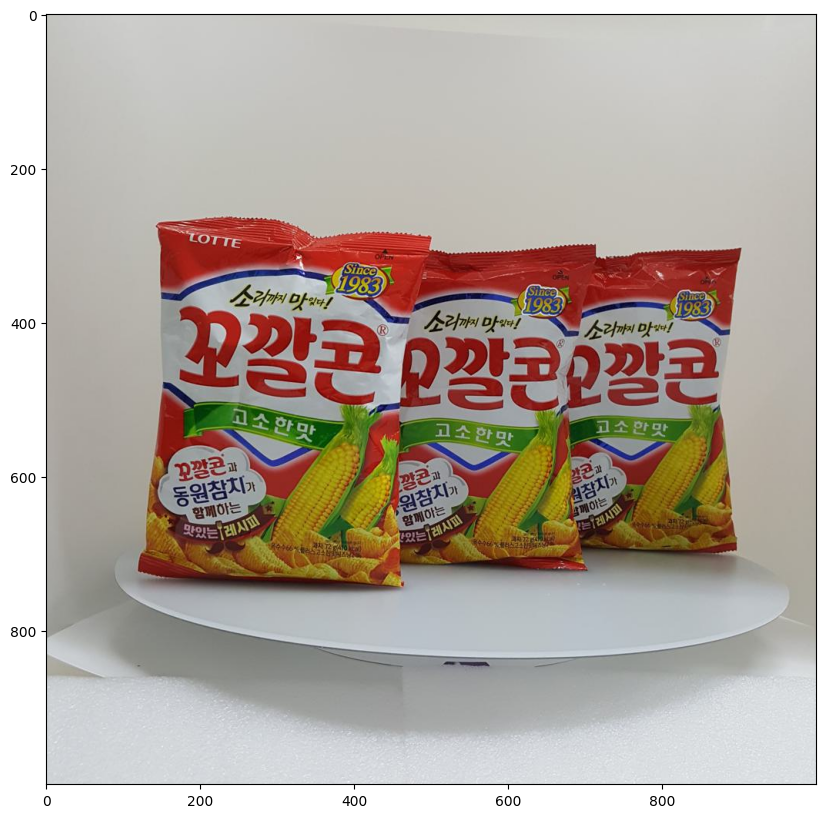

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/snack-data-to50/train/images/10091_0_m_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

# 모델 학습

- Configuration 모델 준비

In [ ]:
from mmengine.config import Config
cfg = Config.fromfile('/content/mmdetection/projects/EfficientDet/configs/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

- Pretrained model 다운로드

In [ ]:
# -c url에서 다운받아 -0 경로에 저장한다.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v3.0/efficientdet/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco_20230223_122457-e6f7a833.pth \
      -O checkpoints/efficientdet_training.pth


- configuration 수정

In [ ]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
  'classes': ('65621', '50098', '30152', '45219', '30064',
              '30166', '50117', '50062', '30120', '20211',
              '10178', '45221', '10092', '30061', '10091',
              '30119', '25679', '30086', '50063', '15033',
              '45222', '65629', '65858', '30066', '50061',
              '20164', '10094', '90078', '30140', '15046',
              '45227', '30060', '15175', '10093', '65723',
              '90072', '10210', '30292', '10209', '45220',
              '35044', '30099', '30096', '65727', '65719',
              '65890', '90073', '10095', '20167', '30291'),
    'palette': [(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60)]
}

cfg.train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=6, val_interval=10)
cfg.train_dataloader.batch_size = 4


# Modify dataset type and path
cfg.data_root = '/content/snack-data-to50'

cfg.train_dataloader.dataset.ann_file = 'train/train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/images'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo



cfg.val_dataloader.dataset.ann_file = 'valid/valid.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'valid/images'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader = cfg.val_dataloader

#cfg.test_dataloader.dataset.ann_file = 'test.json'
#cfg.test_dataloader.dataset.data_root = cfg.data_root
#cfg.test_dataloader.dataset.data_prefix.img = 'images/'
#cfg.test_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader.dataset.pipeline = cfg.val_dataloader.dataset.pipeline
'''
# Modify pipelines
cfg.train_dataloader.dataset.pipeline=[
            dict(type='LoadImageFromFile', backend_args=None),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                type='RandomResize',
                scale=(896, 896),
                ratio_range=(0.1, 2.0),
                keep_ratio=True),
            dict(type="RandomGrayscale"),
            dict(type='RandomCrop', crop_size=(896, 896)),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PackDetInputs')
        ]
'''
# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'valid/valid.json'
#cfg.test_evaluator = cfg.val_evaluator
#cfg.test_evaluator.ann_file = cfg.data_root+'/'+'test.json'

# Modify num classes of the model in box head and mask head
cfg.model.bbox_head.num_classes = 50
# cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/epoch_24.pth'


# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/인공지능/EfficientDet_PTH'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10

# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = '/content/snack-data-to50'
backend_args = None
train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(
            896,
            896,
        ),
        ratio_range=(
            0.1,
            2.0,
        ),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(
        896,
        896,
    )),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackDetInputs'),
]
test_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='Resize', scale=(
        896,
        896,
    ), keep_ratio=True),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PackDetInputs',
        meta_keys=(
            'img_id',
            'img_path',
            'ori_shape',
            'img_shape',
            'scale_factor',
        )),
]
train_dataloader = dict(
    batch_s

In [ ]:
import os

save_path = '/content/test.py'
try :
    os.mkdir(os.path.dirname(save_path))
except FileExistsError:
    print(f"Directory already exists: {os.path.dirname(save_path)}")

cfg.dump(save_path)

Directory already exists: /content


- 데이터 로드 및 학습 시작

In [ ]:
from mmengine.config import Config
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

07/04 05:06:58 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arc

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


07/04 05:07:00 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/04 05:07:00 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_tr

In [ ]:
# model에 어떤 값을 넣어야 할 지 모르겠음
'''

from mmengine.config import Config
from mmengine.runner import Runner

runner = Runner(
    model=ResNet18(),
    work_dir='/content/drive/MyDrive/인공지능/EfficientDet_PTH',
    train_dataloader=cfg.train_dataloader,
    optim_wrapper=dict(optimizer=dict(type='SGD', lr=0.02, momentum=0.9)),
    train_cfg=dict(by_epoch=True, max_epochs=30),
    load_from='/content/drive/MyDrive/인공지능/EfficientDet_PTH/06301500_50set_efficientDet_epoch_20.pth',
    resume=True,
)
runner.train()

NameError: ignored

In [ ]:
runner.train()

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.weight:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.bias:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.weight:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.bias:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv1.conv.bias:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv2.conv.bias:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.weight:weight_decay=0.0
07/04 05:07:07 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.bias:weight_decay=0.0
07/04 05:07:07 - mmengine - INF

EfficientDet(
  (data_preprocessor): DetDataPreprocessor(
    (batch_augments): ModuleList(
      (0): BatchFixedSizePad()
    )
  )
  (backbone): EfficientNet(
    (layers): ModuleList(
      (0): ConvModule(
        (conv): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): _BatchNormXd(40, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (activate): Swish()
      )
      (1): Sequential(
        (0): InvertedResidual(
          (drop_path): Identity()
          (depthwise_conv): ConvModule(
            (conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=(1, 1), groups=40, bias=False)
            (bn): _BatchNormXd(40, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (activate): Swish()
          )
          (se): SELayer(
            (global_avgpool): AdaptiveAvgPool2d(output_size=1)
            (conv1): ConvModule(
              (conv): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
 

# 훈련 결과 확인

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('/content/IMG_3041.jpg',channel_order='rgb')
checkpoint_file = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/epoch_6.pth'
#checkpoint_file = '/content/06301500_50set_efficientDet_epoch_20.pth'#
#checkpoint_file = '/content/checkpoints/efficientdet_training.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: /content/drive/MyDrive/인공지능/EfficientDet_PTH/epoch_6.pth
<DetDataSample(

    META INFORMATION
    ori_shape: (3024, 3024)
    img_id: 0
    img_path: None
    img_shape: (896, 896)
    pad_shape: (896, 896)
    batch_input_shape: (896, 896)
    scale_factor: (0.2962962962962963, 0.2962962962962963)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.9609, 0.8406, 0.6985, 0.6586, 0.6455, 0.5120, 0.4255, 0.3392, 0.3367,
                        0.2942, 0.2900, 0.2829, 0.2593, 0.2425, 0.2409, 0.2116, 0.1697, 0.1408,
                        0.1377, 0.1325, 0.1314, 0.1308, 0.1243, 0.1164, 0.0962, 0.0953, 0.0939,
                        0.0914, 0.0897, 0.0896, 0.0854, 0.0840, 0.0821, 0.0740, 0.0720, 0.0689,
                        0.0679, 0.0660, 0.0646, 0.0595, 0.0535, 0.0526, 0.0522, 0.0504, 0.0502,
                        0.0494, 0.0494, 

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


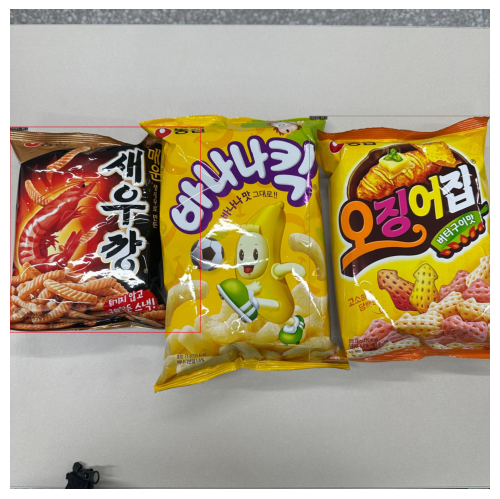

In [ ]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.8
)
visualizer_now.show()